<a href="https://colab.research.google.com/github/alamin-sarker/HIT391_Machine_Learning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#supervised learning

1: EDA, Feature Engineering + Hyperparameters
    
2: Classification Algorithms + Evaluation Metrics

3: Regression Algo + Evaluation Metrics

Step 1:
    
    EDA
    
Step 2:
    
    Feature Engineering
    
Step 3:
    
    Design Hypothesis (Group Work) Atleast 2 - 3.
    
Step 4:
    
    Classification or Regression
    
Step 5:
    
    Evaluation (Testing)
    Metrics (Accuracy, F1 Score, ....)
    
Step 6:
    
    Hyperparameters (Optimization) (Finetuning)
    Metrics

###feature engineering
###classification


*   Logistic Regression
*   Naive Bayes
*   K-Nearest Neighbors
*   Decision Tree
*   Support Vector Machines


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.target_names)

['malignant' 'benign']


In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

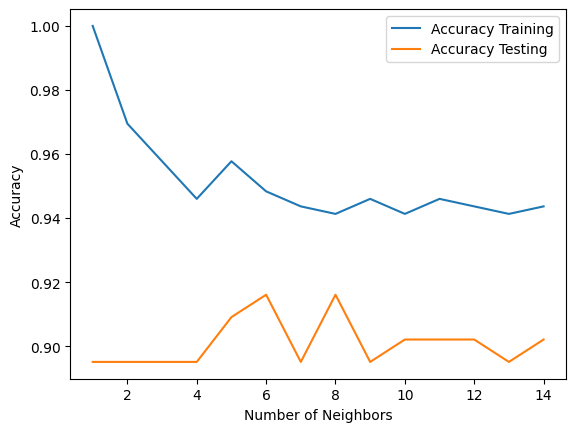

In [ ]:
#knn

from sklearn.neighbors import KNeighborsClassifier

training_acc = []
test_acc = []

neighbors_setting = range(1, 15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors) #loading the classifier
    knn.fit(X_train, y_train) #training the classifier
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, training_acc, label= 'Accuracy Training')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy Testing')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [ ]:
print(test_acc)

[0.8951048951048951, 0.8951048951048951, 0.8951048951048951, 0.8951048951048951, 0.9090909090909091, 0.916083916083916, 0.8951048951048951, 0.916083916083916, 0.8951048951048951, 0.9020979020979021, 0.9020979020979021, 0.9020979020979021, 0.8951048951048951, 0.9020979020979021]


In [ ]:
from sklearn.metrics import f1_score, recall_score
y_pred = knn.predict(X_test)

In [ ]:
score = recall_score(y_test, y_pred)

In [ ]:
score

0.9662921348314607

In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(log_reg.score(X_train, y_train))

0.9530516431924883


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(log_reg.score(X_test, y_test)) #main indicator

0.958041958041958


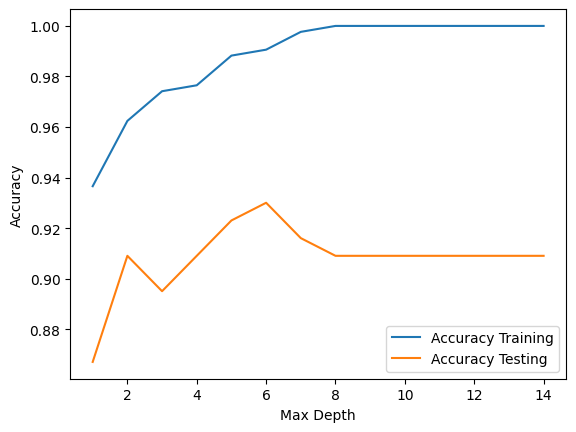

In [ ]:
#decison trees

from sklearn.tree import DecisionTreeClassifier

max_dep = range(1, 15)

trainDT_acc = []
testDT_acc = []


for md in max_dep:
    tree = DecisionTreeClassifier(max_depth = md, random_state = 0) #loading the classifier
    tree.fit(X_train, y_train) #training the classifier
    trainDT_acc.append(tree.score(X_train, y_train))
    testDT_acc.append(tree.score(X_test, y_test))

plt.plot(max_dep, trainDT_acc, label= 'Accuracy Training')
plt.plot(max_dep, testDT_acc, label = 'Accuracy Testing')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [ ]:
testDT_acc

[0.8671328671328671,
 0.9090909090909091,
 0.8951048951048951,
 0.9090909090909091,
 0.9230769230769231,
 0.9300699300699301,
 0.916083916083916,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091]

In [ ]:
print(tree.feature_importances_)

[0.00754534 0.03374621 0.01006046 0.         0.         0.
 0.00902349 0.01925661 0.         0.         0.         0.
 0.         0.00327951 0.00155508 0.         0.         0.
 0.         0.         0.         0.02033696 0.74806918 0.02790112
 0.         0.00670697 0.0098407  0.10267836 0.         0.        ]


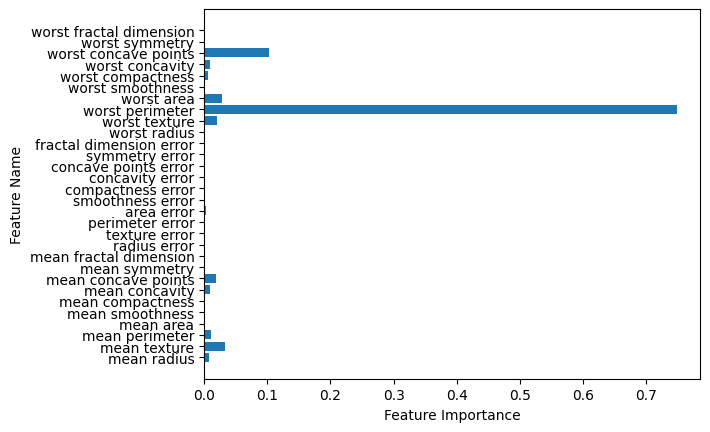

In [ ]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [ ]:
#randomforest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
forest.score(X_train, y_train)

1.0

In [ ]:
forest.score(X_test, y_test)

0.9370629370629371

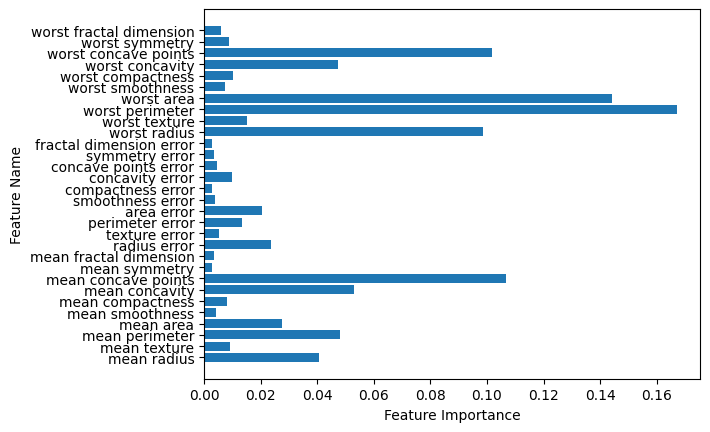

In [ ]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [ ]:
#SVM
from sklearn.svm import SVC

svm = SVC(C = 1000)
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


In [ ]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis = 0)


X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print(X_train_scaled.min(axis = 0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train_scaled.max(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
print(X_test_scaled.min(axis = 0))

[ 0.03540158  0.08927968  0.02895446  0.01497349  0.14662757  0.03907736
  0.          0.         -0.07784431 -0.00614537  0.00137606  0.00041991
 -0.00067897  0.00262048  0.03243023  0.02500305  0.          0.
 -0.02992624  0.00191396  0.03678406  0.07462687  0.03366702  0.01400904
  0.15508909  0.02856769  0.          0.         -0.00754717 -0.00144325]


In [ ]:
print(X_test_scaled.max(axis = 0))

[0.9578778  0.72404464 0.95577362 0.89353128 1.20310633 0.68069444
 0.74367385 0.9333996  0.83832335 0.94871795 0.45573058 0.7814268
 0.40797601 0.40586255 0.52680423 1.35384553 0.30227273 0.53059292
 0.60479979 0.75885466 0.89612238 0.93656716 0.84859804 0.79797483
 1.09233211 1.22585364 0.88258786 0.92371134 0.70764647 1.29289413]


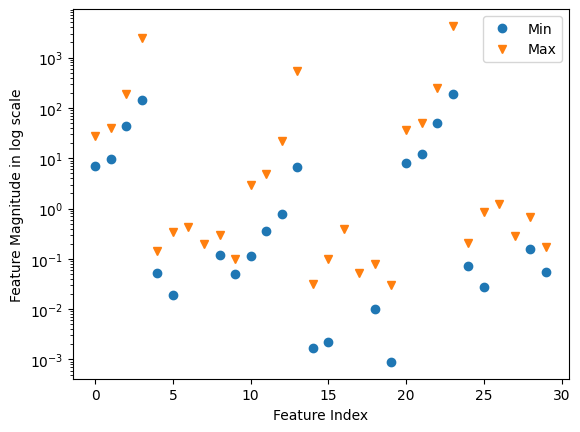

In [ ]:
plt.plot(X_train.min(axis = 0), 'o', label = 'Min')
plt.plot(X_train.max(axis=0), 'v', label = 'Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in log scale')
plt.yscale('log')
plt.legend(loc = 'upper right')

In [ ]:
#hyperparameters

from sklearn.svm import SVC

svm = SVC(C = 10000)
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9694835680751174
0.951048951048951


In [ ]:
#feature engineering

import pandas as pd

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Assignment2 Report
1. Data Description
2. EDA
3. Feature Eng
4. Hypothesis Formulation
4. Class
5. Evaluation
6. Fine Tuning
7. Reg
8. Eval
9. Fine TUne
10. H1 - Comparasions
10. H2 - comparasions.